# Doctor's Consultation Fees Prediction

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

# importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [3]:
import os #reading the file
train = pd.read_excel('Final_Train.xlsx')
test = pd.read_excel('Final_Test.xlsx')

checking dataset

In [36]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [37]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [10]:
train.shape

(5961, 7)

There are 5961 rows and 7 columns

In [ ]:
#sreaching for data types

In [9]:
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Info shows you how many floats, integers and objects are present. And here 1 integer type and 6 object type

In [7]:
print('Qualification:', train['Qualification'].nunique())
print('Experience:', train['Experience'].nunique())
print('Rating:', train['Rating'].nunique())
print('Place:', train['Place'].nunique())
print('Profile', train['Profile'].nunique())

Qualification: 1420
Experience: 64
Rating: 51
Place: 877
Profile 6


<AxesSubplot:>

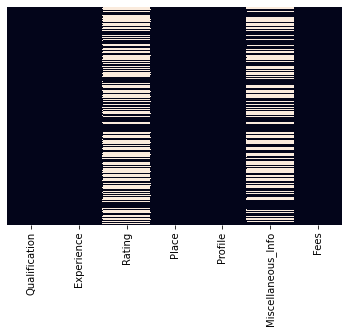

In [6]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False) #there are two null values

In [43]:
import matplotlib.gridspec as gridspec
def numerical_analysis(feature,data):
    fig=plt.figure(constrained_layout=True)
    grid=gridspec.GridSpec(ncols=1,nrows=1,figure=fig)
   # ax1=fig.add_subplot(grid[0,0])
    #sns.distplot(data[feature],ax=ax1)
    #ax2=fig.add_subplot(grid[1,:])
    #sns.countplot(x=feature,data=df,hue='Attrition',ax=ax2)
    ax3=fig.add_subplot(grid[0,0])
    sns.boxplot(x='Attrition',y=feature,data=df,ax=ax3)
    

# Visualizing the numerical columns

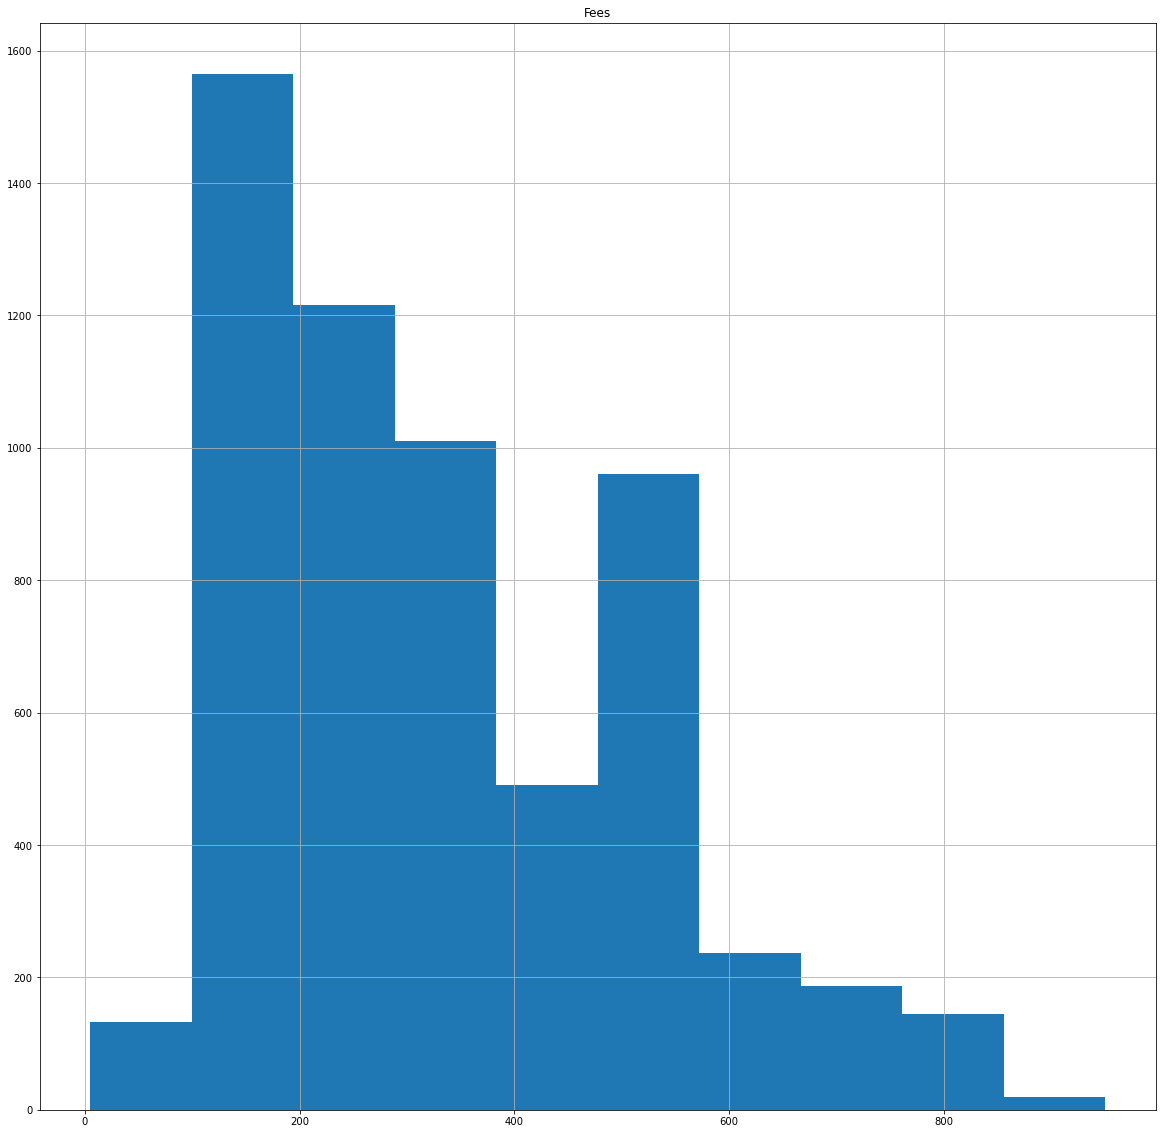

In [44]:
train.hist(figsize = (20,20))
plt.show()

In [11]:
train.columns #loading colun=mns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [12]:
df_train = train[['Qualification', 'Profile', 'Experience', 'Place', 'Miscellaneous_Info', 'Rating','Fees']]
df_test = test[['Qualification', 'Profile','Experience', 'Place', 'Miscellaneous_Info', 'Rating']]

In [13]:
df_train.head()

,Qualification,Profile,Experience,Place,Miscellaneous_Info,Rating,Fees
0,"BHMS, MD - Homeopathy",Homeopath,24 years experience,"Kakkanad, Ernakulam","100% 16 Feedback Kakkanad, Ernakulam",100%,100
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,12 years experience,"Whitefield, Bangalore","98% 76 Feedback Whitefield, Bangalore",98%,350
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,9 years experience,"Mathikere - BEL, Bangalore",NaN,NaN,300
3,"BSc - Zoology, BAMS",Ayurveda,12 years experience,"Bannerghatta Road, Bangalore","Bannerghatta Road, Bangalore ₹250 Available on...",NaN,250
4,BAMS,Ayurveda,20 years experience,"Keelkattalai, Chennai","100% 4 Feedback Keelkattalai, Chennai",100%,250


In [14]:
df_train['Experience'] = df_train['Experience'].str.replace('years experience','').astype(int)
df_test['Experience'] = df_test['Experience'].str.replace('years experience','').astype(int)

In [15]:
import re #importing re 

Cleaning datasets

In [16]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_train['Qualification'] = df_train['Qualification'].apply(clean_text)
df_test['Qualification'] = df_test['Qualification'].apply(clean_text)

def clean_place(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_train['Place'].fillna('missing', inplace=True)
df_test['Place'].fillna('missing', inplace=True)
df_train['Place'] = df_train['Place'].apply(clean_place)
df_test['Place'] = df_test['Place'].apply(clean_place)

In [17]:
df_train['Rating'].fillna('0%', inplace=True)
df_test['Rating'].fillna('0%', inplace=True)

def clean_rating(text):
    text = re.sub(r'%', '', str(text))
    return text

df_train['Rating'] = df_train['Rating'].apply(clean_rating)
df_train['Rating'] = df_train['Rating'].astype(int)

df_test['Rating'] = df_test['Rating'].apply(clean_rating)
df_test['Rating'] = df_test['Rating'].astype(int)

In [18]:
df_train['Miscellaneous_Info'].fillna('missing', inplace=True)
df_test['Miscellaneous_Info'].fillna('missing', inplace=True)

def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

df_train['Feedback'] = df_train['Miscellaneous_Info'].apply(get_feedback)
df_train['Feedback'] = df_train['Feedback'].str.replace(' Feedback','')
df_train['Feedback'] = df_train['Feedback'].astype(int)

df_test['Feedback'] = df_test['Miscellaneous_Info'].apply(get_feedback)
df_test['Feedback'] = df_test['Feedback'].str.replace(' Feedback','')
df_test['Feedback'] = df_test['Feedback'].astype(int)

In [19]:
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text != []:
        return text[0]
    else:
        return 0

df_train['Misc_Fees'] = df_train['Miscellaneous_Info'].apply(get_fee)
df_train['Misc_Fees'] = df_train['Misc_Fees'].str.replace('₹','')
df_train['Misc_Fees'].fillna(50, inplace=True)
df_train['Misc_Fees'] = df_train['Misc_Fees'].astype(int)

df_test['Misc_Fees'] = df_test['Miscellaneous_Info'].apply(get_fee)
df_test['Misc_Fees'] = df_test['Misc_Fees'].str.replace('₹','')
df_test['Misc_Fees'].fillna(50, inplace=True)
df_test['Misc_Fees'] = df_test['Misc_Fees'].astype(float)

In [20]:
def clean_misc(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_train['Miscellaneous_Info'] = df_train['Miscellaneous_Info'].apply(clean_misc)
df_test['Miscellaneous_Info'] = df_test['Miscellaneous_Info'].apply(clean_misc)

In [21]:
df_train = pd.get_dummies(df_train, columns=['Profile'])
df_test  = pd.get_dummies(df_test,  columns=['Profile'])

In [22]:
df_train.head()

,Qualification,Experience,Place,Miscellaneous_Info,Rating,Fees,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,bhms md homeopathy,24,kakkanad ernakulam,100 16 feedback kakkanad ernakulam,100,100,16,50,0,0,0,0,0,1
1,bams md ayurveda medicine,12,whitefield bangalore,98 76 feedback whitefield bangalore,98,350,76,50,1,0,0,0,0,0
2,mbbs ms otorhinolaryngology,9,mathikere bel bangalore,missing,0,300,0,50,0,0,0,1,0,0
3,bsc zoology bams,12,bannerghatta road bangalore,bannerghatta road bangalore 250 available on s...,0,250,0,250,1,0,0,0,0,0
4,bams,20,keelkattalai chennai,100 4 feedback keelkattalai chennai,100,250,4,50,1,0,0,0,0,0


# train test split

In [23]:
X = df_train.drop(labels=['Fees'], axis=1)
y = df_train['Fees'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4470, 13), (4470,), (1491, 13), (1491,))

In [25]:
X_train.columns

Index(['Qualification', 'Experience', 'Place', 'Miscellaneous_Info', 'Rating',
       'Feedback', 'Misc_Fees', 'Profile_Ayurveda', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

# build model

In [26]:
X_train_qual = X_train['Qualification']
X_cv_qual = X_cv['Qualification']

X_train_place = X_train['Place']
X_cv_place = X_cv['Place']

X_train_misc = X_train['Miscellaneous_Info']
X_cv_misc = X_cv['Miscellaneous_Info']

from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
X_train_qual = tf1.fit_transform(X_train_qual)
X_cv_qual = tf1.transform(X_cv_qual)

tf2 = TfidfVectorizer()
X_train_place = tf2.fit_transform(X_train_place)
X_cv_place = tf2.transform(X_cv_place)

tf3 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
X_train_misc = tf3.fit_transform(X_train_misc)
X_cv_misc = tf3.transform(X_cv_misc)

In [27]:
X_train_exp = np.array(X_train['Experience']).reshape(-1,1)
X_cv_exp = np.array(X_cv['Experience']).reshape(-1,1)

X_train_feedback = np.array(X_train['Feedback']).reshape(-1,1)
X_cv_feedback = np.array(X_cv['Feedback']).reshape(-1,1)

X_train_rating = np.array(X_train['Rating']).reshape(-1,1)
X_cv_rating = np.array(X_cv['Rating']).reshape(-1,1)

cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine']
X_train_prof = X_train[cols]
X_cv_prof = X_cv[cols]

X_train_miscfees = np.array(X_train['Misc_Fees']).reshape(-1,1)
X_cv_miscfees = np.array(X_cv['Misc_Fees']).reshape(-1,1)

Importing srt

In [28]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [29]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
merged_cv  = hstack((X_cv_exp, X_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc, X_cv_miscfees))

In [30]:
merged_train.shape, merged_cv.shape

((4470, 8599), (1491, 8599))

Installing xgboost

In [31]:
!pip install xgboost

XGBRegressor

In [32]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, 
                   gamma=100, 
                   max_depth=25,  
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=0.75,  
                   colsample_bylevel=0.95,  
                   colsample_bytree=0.70,  
                   reg_lambda=1)
xgb.fit(merged_train, y_train)
y_pred1 = xgb.predict(merged_cv)
y_pred1 = y_pred1.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred1)))

RMSLE: 0.5713594153818623


Installing lightbm

In [33]:
!pip install lightgbm

In [78]:
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)
test_data = lgb.Dataset(merged_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'dart',
         'num_iterations': 152,   
         'learning_rate': 0.1,  
         'num_leaves': 52, 
         'max_depth': 28, 
         'min_data_in_leaf': 3, 
         'feature_fraction': 0.66,  
         'feature_fraction_seed': 10,
         'drop_seed': 4,
         'alpha': 100,
         'max_bin': 7,
         'min_data_in_bin': 45,   
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 verbose_eval=0,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred2 = lgbm.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred2)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6235
[LightGBM] [Info] Number of data points in the train set: 4470, number of used features: 2961
[LightGBM] [Info] Start training from score 307.347651
RMSLE: 0.563087173685677


BaggingRegressor

In [34]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=80,  
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=True,
                      oob_score=True,
                      n_jobs=None, 
                      random_state=13, 
                      verbose=0)
br.fit(merged_train, y_train)
y_pred5 = br.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred5)))
print('RMSE:', sqrt(mean_squared_error(y_cv, y_pred5)))
#     0.58019310689049

RMSLE: 0.5847777476449565
RMSE: 162.10313142537169


In [35]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_feedback, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc))
merged_cv  = hstack((X_cv_exp, X_cv_feedback, X_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc))

In [40]:
merged_train.shape, merged_test.shape

((161, 7), (161, 7))

In [39]:
import pandas as pd 

merged_test = pd.merge(train, test)
merged_train = pd.merge(train, test)